In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#training data gerneration
x1 = 8*np.random.rand(100, 1)
x2 = 7*np.random.rand(100, 1) - 4

g = 0.8*x1 + x2 - 3
g1 = g - 1
g0 = g + 1

# C1: g >=0, C0: g<0

C1 = np.where(g1 >= 0)[0]
C0 = np.where(g0 < 0)[0]

In [3]:
xp = np.linspace(-1,9,100).reshape(-1,1)
ypt = -0.8*xp + 3

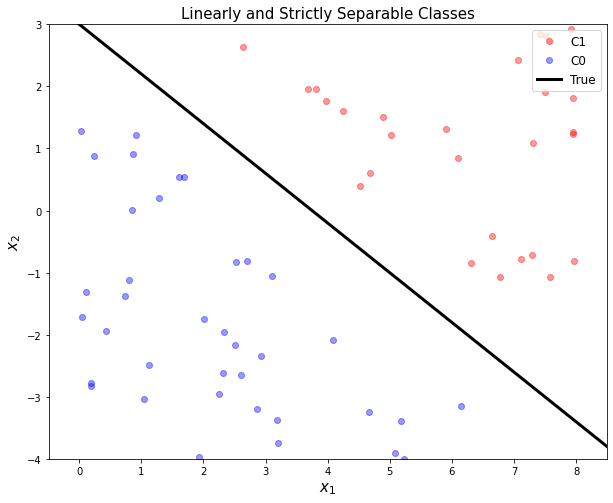

In [4]:
plt.figure(figsize=(10, 8))
plt.plot(x1[C1], x2[C1], 'ro', alpha = 0.4, label = 'C1')
plt.plot(x1[C0], x2[C0], 'bo', alpha = 0.4, label = 'C0')
plt.plot(xp, ypt, 'k', linewidth = 3, label = 'True')
plt.title('Linearly and Strictly Separable Classes', fontsize = 15)
plt.xlabel(r'$x_1$', fontsize = 15)
plt.ylabel(r'$x_2$', fontsize = 15)
plt.legend(loc = 1, fontsize = 12)
plt.axis('equal')
plt.xlim([0, 8])
plt.ylim([-4, 3])
plt.show()

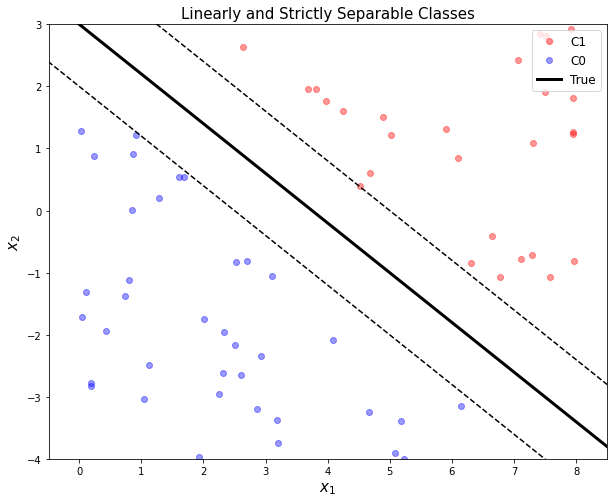

In [5]:
#  see how data are generated
xp = np.linspace(-1,9,100).reshape(-1,1)
ypt = -0.8*xp + 3

plt.figure(figsize=(10, 8))
plt.plot(x1[C1], x2[C1], 'ro', alpha = 0.4, label = 'C1')
plt.plot(x1[C0], x2[C0], 'bo', alpha = 0.4, label = 'C0')
plt.plot(xp, ypt, 'k', linewidth = 3, label = 'True')
plt.plot(xp, ypt-1, '--k')
plt.plot(xp, ypt+1, '--k')
plt.title('Linearly and Strictly Separable Classes', fontsize = 15)
plt.xlabel(r'$x_1$', fontsize = 15)
plt.ylabel(r'$x_2$', fontsize = 15)
plt.legend(loc = 1, fontsize = 12)
plt.axis('equal')
plt.xlim([0, 8])
plt.ylim([-4, 3])
plt.show()

In [6]:
#Data Preparing
X1 = np.hstack([x1[C1], x2[C1]])
X0 = np.hstack([x1[C0], x2[C0]])

X1 = np.asmatrix(X1)
X0 = np.asmatrix(X0)

X = np.vstack([X1, X0])
y = np.vstack([np.ones([C1.shape[0],1]), -np.ones([C0.shape[0],1])])

In [7]:

from sklearn import linear_model

clf = linear_model.Perceptron(tol=1e-3)
clf.fit(X, np.ravel(y))

Perceptron()

In [8]:
w0 = clf.intercept_[0]
w1 = clf.coef_[0,0]
w2 = clf.coef_[0,1]

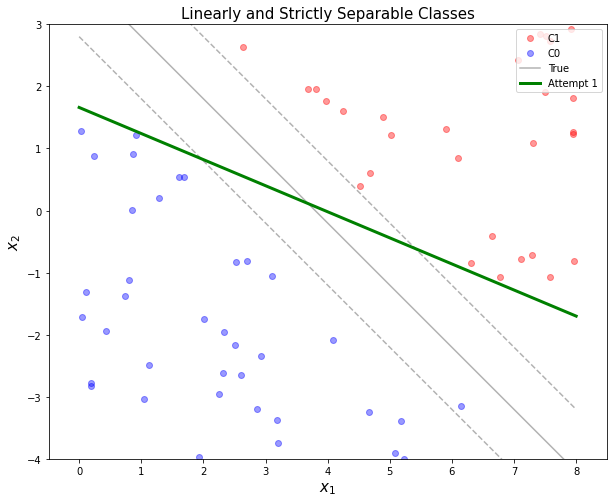

In [9]:
xp = np.linspace(0,8,100).reshape(-1,1)
yp = - w1/w2*xp - w0/w2

plt.figure(figsize=(10, 8))
plt.plot(x1[C1], x2[C1], 'ro', alpha = 0.4, label = 'C1')
plt.plot(x1[C0], x2[C0], 'bo', alpha = 0.4, label = 'C0')
plt.plot(xp, ypt, 'k', alpha = 0.3, label = 'True')
plt.plot(xp, ypt-1, '--k', alpha = 0.3)
plt.plot(xp, ypt+1, '--k', alpha = 0.3)
plt.plot(xp, yp, 'g', linewidth = 3, label = 'Attempt 1')
plt.title('Linearly and Strictly Separable Classes', fontsize = 15)
plt.xlabel(r'$x_1$', fontsize = 15)
plt.ylabel(r'$x_2$', fontsize = 15)
plt.legend(loc = 1)
plt.axis('equal')
plt.xlim([0, 8])
plt.ylim([-4, 3])
plt.show()

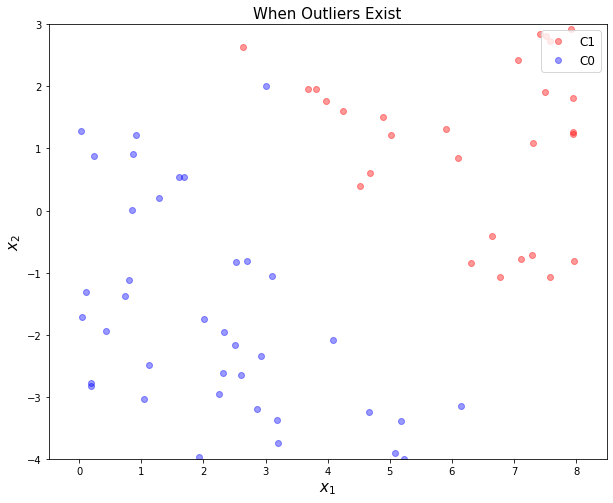

In [11]:
X1 = np.hstack([x1[C1], x2[C1]])
X0 = np.hstack([x1[C0], x2[C0]])

# Make X0 has outlier point (3,2)
outlier = np.array([3, 2]).reshape(1, -1)
X0 = np.vstack([X0, outlier])

X1 = np.asmatrix(X1)
X0 = np.asmatrix(X0)

plt.figure(figsize=(10,8))
plt.plot(X1[:,0], X1[:,1], 'ro', alpha = 0.4, label = 'C1')
plt.plot(X0[:,0], X0[:,1], 'bo', alpha = 0.4, label = 'C0')
plt.title('When Outliers Exist', fontsize = 15)
plt.xlabel(r'$x_1$', fontsize = 15)
plt.ylabel(r'$x_2$', fontsize = 15)
plt.legend(loc = 1, fontsize = 12)
plt.axis('equal')
plt.xlim([0, 8])
plt.ylim([-4, 3])
plt.show()

In [12]:
from sklearn.svm import LinearSVC

In [13]:
X = np.vstack([X1, X0])
y = np.vstack([np.ones([X1.shape[0],1]), -np.ones([X0.shape[0],1])])

In [14]:
#Use SVM Library to find out weight
clf = LinearSVC(C = 1.0)
clf.fit(X, y)

/home/pirl/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LinearSVC()

In [15]:
print(clf.intercept_)

[-1.77383502]


In [16]:
print(clf.coef_)

[[0.45487516 0.47309592]]


In [17]:
w0 = clf.intercept_[0]
w1 = clf.coef_[0][0]
w2 = clf.coef_[0][1]
w0, w1, w2

(-1.7738350220204628, 0.45487515706442033, 0.4730959242857871)

In [18]:
xp = np.linspace(-1,9,100).reshape(-1,1)
yp = - w1/w2*xp - w0/w2

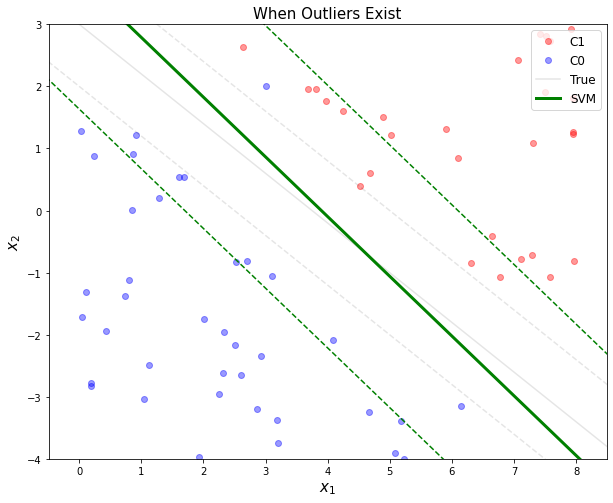

In [19]:
plt.figure(figsize=(10, 8))
plt.plot(X1[:,0], X1[:,1], 'ro', alpha = 0.4, label = 'C1')
plt.plot(X0[:,0], X0[:,1], 'bo', alpha = 0.4, label = 'C0')
plt.plot(xp, ypt, 'k', alpha = 0.1, label = 'True')
plt.plot(xp, ypt-1, '--k', alpha = 0.1)
plt.plot(xp, ypt+1, '--k', alpha = 0.1)
plt.plot(xp, yp, 'g', linewidth = 3, label = 'SVM')
plt.plot(xp, yp-1/w2, '--g')
plt.plot(xp, yp+1/w2, '--g')
plt.title('When Outliers Exist', fontsize = 15)
plt.xlabel(r'$x_1$', fontsize = 15)
plt.ylabel(r'$x_2$', fontsize = 15)
plt.legend(loc = 1, fontsize = 12)
plt.axis('equal')
plt.xlim([0, 8])
plt.ylim([-4, 3])
plt.show()